In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np


df = pd.read_csv("../materials.csv")

selected_features = [
    "band_gap",
    "is_metal",
    "formation_energy_per_atom",
    "efermi",
    "ordering",
    "total_magnetization_normalized_vol",
    "total_magnetization",
    "num_magnetic_sites",
    "density",
    "density_atomic",
]

df = df[selected_features]

/var/folders/fx/5bn5b6s55cg4fcjfktwzqvkw0000gn/T/ipykernel_53761/2682746770.py:12: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../materials.csv")


In [33]:
df.dropna(inplace=True)

In [34]:
label_encoder = LabelEncoder()

df["ordering"] = label_encoder.fit_transform(df["ordering"])
df["is_metal"] = label_encoder.fit_transform(df["is_metal"])

In [35]:
X = df.drop(columns=["band_gap"])
y = df["band_gap"]

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [38]:
model = RandomForestRegressor(n_estimators=500, max_depth=400, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=400, n_estimators=500, random_state=42)

In [39]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.22303062033070783
Mean Absolute Error: 0.20810378649401925
R² Score: 0.8770931281762889


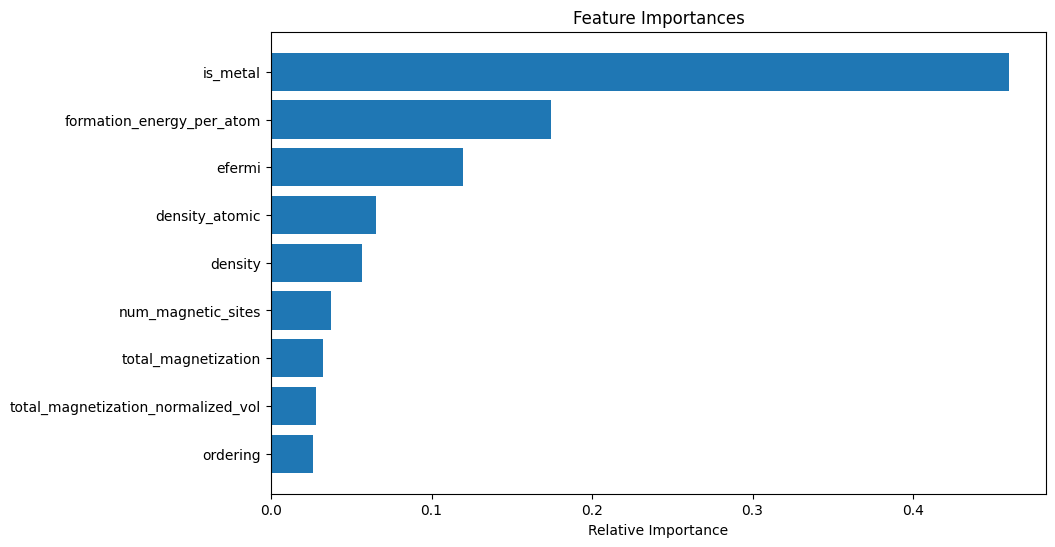

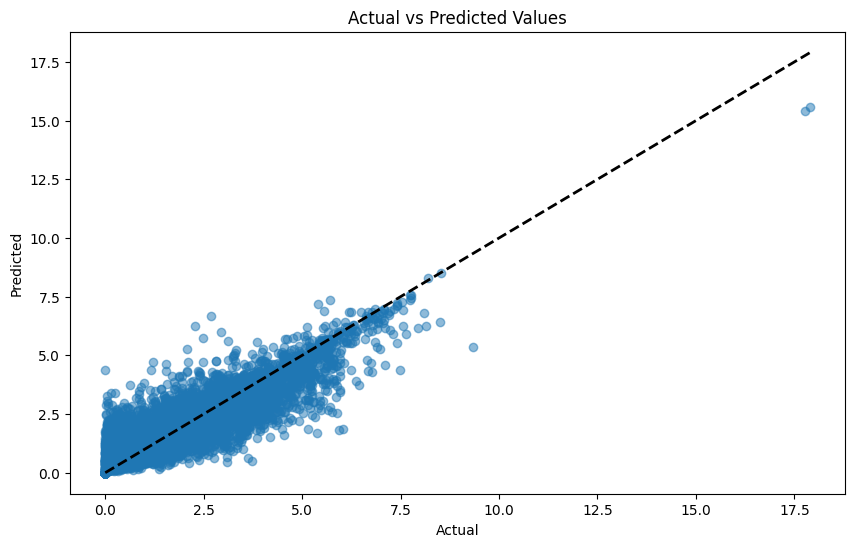

In [40]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()